# **Table of Contents**
* [Measures of Central Tendency](#section_1)
* [Measures of Dispersion](#section_2)
* [Correlation , Covariance](#section_3)
* [Transformation](#section_4)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df  =  pd.read_csv ('datasets/Height_Weight.csv')

df.sample(5)

,Gender,Height,Weight
318,Male,170,95
247,Female,142,159
220,Female,173,82
266,Male,173,139
15,Female,153,107


In [3]:
df.shape

(500, 3)

In [4]:
df.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


<a id='section_1'></a>
# 1. **MCT**

* Mean
* Median
* Mode
* Quantiles

In [6]:
df.mean()

Height    169.944
Weight    106.000
dtype: float64

In [7]:
df.median()

Height    170.5
Weight    106.0
dtype: float64

In [8]:
df.mode()

,Gender,Height,Weight
0,Female,188.0,50
1,NaN,NaN,80
2,NaN,NaN,104


In [9]:
df.quantile (0.25)

Height    156.0
Weight     80.0
Name: 0.25, dtype: float64

In [10]:
df.quantile (0.50)

Height    170.5
Weight    106.0
Name: 0.5, dtype: float64

In [11]:
df.quantile (0.75)

Height    184.0
Weight    136.0
Name: 0.75, dtype: float64

### 'Height' Col

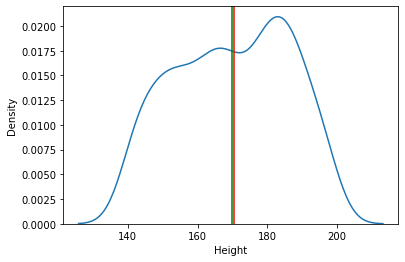

In [12]:
sns.distplot ( df['Height'] , hist=False )

plt.axvline  ( df['Height'].mean()   ,  color='green')
plt.axvline  ( df['Height'].median() ,  color='red'  )

plt.show()

<a id='section_2'></a>
# 2. **MD**

indicate how spread the data is, or how the data points vary. <br>
* range 
* variance 
* SD 
* absolute deviation / mean absolute deviation

In [13]:
df['Height'].max() - df['Height'].min()                  # range = max - min

59

In [14]:
df.var()

Height     268.149162
Weight    1048.633267
dtype: float64

In [15]:
df.std()

Height    16.375261
Weight    32.382607
dtype: float64

In [16]:
df ['Height'].skew()

-0.12191368980139153

In [17]:
df ['Height'].kurtosis()

-1.1196709495148123

<a id='section_3'></a>
# 3. **Corr , Cov**

* Covariance is a numerical measure that indicates the inter-dependency between two variables. 
* Covariance indicates how two variables behave together in relation to their averages. 
* A covariance of 0 indicates that the variables are totally independant, while a high and positive covariance value means that a variable is big when the other is big. Analogously, a negative covariance with a high absolute value means that one variable is big when the other is small.

In [18]:
df.corr()

,Height,Weight
Height,1.000000,0.000446
Weight,0.000446,1.000000


* -1 : a perfect anti-correlation,  1: perfect correlation
* Note that famous concept that says that "correlation does not imply causation".

In [19]:
df.cov()

,Height,Weight
Height,268.149162,0.236473
Weight,0.236473,1048.633267


OBS
* Hard to be understood and compared, because it gives values in different scales as the variables change
* For a better comparison, we normalize covariance to a value that will always be between -1 and 1 , so it can be better understood

<a id='section_4'></a>
# 4. **Transformation**

In [2]:
df = pd.read_csv ('datasets/ammonia.csv')

df.sample(5)

,Ammonia
25,39.54
1146,44.45
493,48.01
348,38.00
801,36.99


## **Original Distribution**

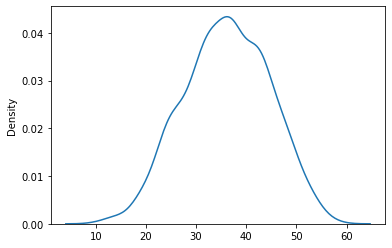

In [6]:
sns.distplot ( df , hist=False ) ;

> Comments :

        * Slightly left skewed

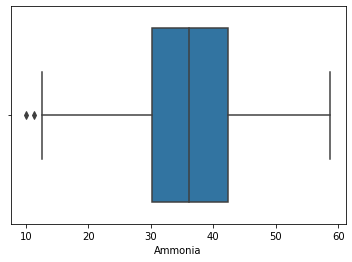

In [7]:
sns.boxplot ( df['Ammonia'] )  ;

> Comments :

        * Presence of few outliers in left part
        * Hence , slightly left skewed.

## **Transformation**

In [8]:
df1   =  np.sqrt (df)
df2   =  np.log  (df)

df3 , lmb  =  stats.boxcox (df)                     # lmb - lambda value used for transformation

## **New Distribution**

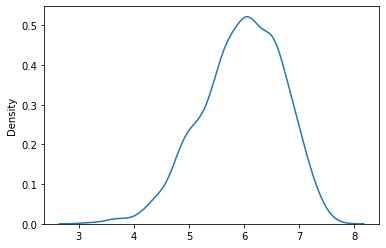

In [9]:
sns.distplot ( df1 , hist=False ) ;

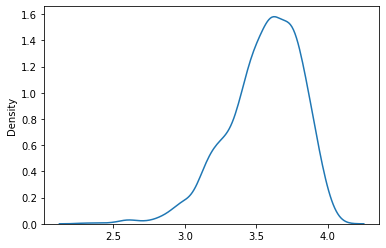

In [10]:
sns.distplot ( df2 , hist=False ) ;

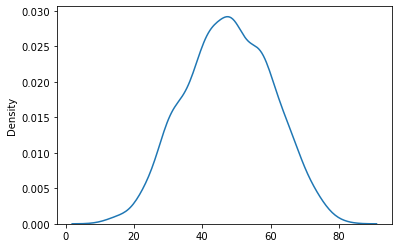

In [11]:
sns.distplot ( df3 , hist=False ) ;